# Borrowers Reliability Study

Evaluate the impact of various customer characteristics on loan repayment for the bank's credit department. Analyze client solvency data, address missing values, and handle duplicates. Use pivot tables to assess the relationship between loan repayment, marital status, and the number of children. This information will inform credit scoring models.

## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/datasets/data.csv')

In [3]:

data.info()
display (data.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [46]:
data['debt'].value_counts()

0    19670
1     1732
Name: debt, dtype: int64

We can see that out of 21 525 clients in the dataset 1 732 are overdue debts which is around 8%

### Replacing outliers and missing values

In [4]:
data.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

There are missing values in collumns 'days_employed' and 'total_income'. Lets look closer at these collumns

In [5]:
data['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

It appears that the 'days_employed' column represents some measure of employment duration, but there are negative values (e.g., min and percentiles) which might need further investigation to ensure data accuracy. Additionally, the maximum value seems unusually large, indicating potential outliers. Further analysis and data cleansing may be necessary before using this data for any analysis or visualization.

In [6]:
negative_days_employed_data = data[data['days_employed'] < 0]

In [7]:
 negative_days_employed_data.shape[0]

15906

In [8]:
negative_days_employed_data.shape[0]/data.shape[0]

0.7389547038327526

Out of 19 351 lines of information with days emplyed 15 906 lines are negative, which is almost 74%. We can not remove all of them, beacuse its significant amount of data, so lets assume that it was an iput mistake and replace all negative with the same positive.    

In [9]:
data['days_employed'] = data['days_employed'].abs()

In [10]:
data['days_employed'].describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

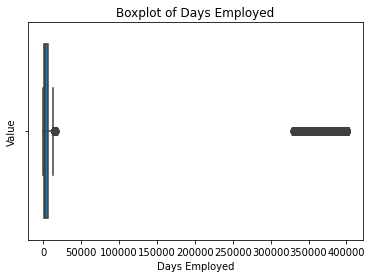

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.boxplot(x=data['days_employed'])
plt.xlabel('Days Employed')
plt.ylabel('Value')
plt.title('Boxplot of Days Employed')
plt.show()

We can see that there are outliers. Days above 300000 are not reasonable. Lets see the share of outliers 

In [13]:
days_employed_median_value=data['days_employed'].median()
print(days_employed_median_value)

2194.220566878695


Lets assume that outliers are all values above 30 000 days and replace them with meadian value

In [14]:
outliers = data[data['days_employed'] > 30000]


In [15]:
data.loc[outliers.index, 'days_employed'] =days_employed_median_value

In [16]:
data['days_employed'].describe()

count    19351.000000
mean      2324.746073
std       2089.961651
min         24.141633
25%        927.009265
50%       2194.220567
75%       2747.423625
max      18388.949901
Name: days_employed, dtype: float64

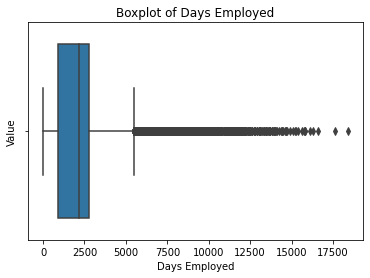

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.boxplot(x=data['days_employed'])
plt.xlabel('Days Employed')
plt.ylabel('Value')
plt.title('Boxplot of Days Employed')
plt.show()

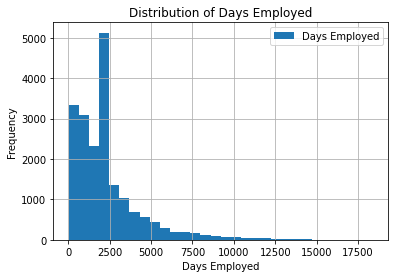

In [18]:
data['days_employed'].hist(bins=30)  
plt.xlabel('Days Employed')
plt.ylabel('Frequency')
plt.title('Distribution of Days Employed')
plt.legend(['Days Employed'])
plt.show()

We can see that most clients have less than 2500 days employed.

Lets replace missing values in days_employed and total_income with median

In [19]:
data['days_employed'].fillna(days_employed_median_value, inplace=True)

In [20]:
total_income_median_value=data['total_income'].median()
print(total_income_median_value)

145017.93753253992


In [21]:
data['total_income'].fillna(total_income_median_value, inplace=True)

Let's analyze anomalies in columns with categorical variables.
Categorical columns include: children, education, education_id, family_status, family_status_id, gender, income_type, debt, purpose

In [22]:
print('children', data['children'].unique())

children [ 1  0  3  2 -1  4 20  5]


Found anomalies: -1, 20

Lets see how many rows correspond to these anomalies

In [23]:
child_counts = data['children'].value_counts()
print(child_counts)

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


As the amount of rows with anomalies is insignificant lets just remove them

In [24]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [25]:
print('education', data['education'].unique())

education ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']


There are values that are written differently - some in uppercase and some in lowercase. We will convert them to a consistent case.

In [26]:
data['education']=data['education'].str.lower()
print('education', data['education'].unique())

education ['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


In [27]:
print('education_id', data['education_id'].unique())

education_id [0 1 2 3 4]


In [28]:
print('family_status', data['family_status'].unique())

family_status ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']


In [29]:
print('family_status_id', data['family_status_id'].unique())

family_status_id [0 1 2 3 4]


In [30]:
print('gender', data['gender'].unique())

gender ['F' 'M' 'XNA']


In [31]:
print('income_type', data['income_type'].unique())

income_type ['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']


In [32]:
print('debt', data['debt'].unique())

debt [0 1]


In [33]:
print('purpose', data['purpose'].sort_values().unique())

purpose ['автомобили' 'автомобиль' 'высшее образование'
 'дополнительное образование' 'жилье' 'заняться высшим образованием'
 'заняться образованием' 'на покупку автомобиля'
 'на покупку подержанного автомобиля' 'на покупку своего автомобиля'
 'на проведение свадьбы' 'недвижимость' 'образование' 'операции с жильем'
 'операции с коммерческой недвижимостью' 'операции с недвижимостью'
 'операции со своей недвижимостью' 'покупка жилой недвижимости'
 'покупка жилья' 'покупка жилья для сдачи' 'покупка жилья для семьи'
 'покупка коммерческой недвижимости' 'покупка недвижимости'
 'покупка своего жилья' 'получение высшего образования'
 'получение дополнительного образования' 'получение образования'
 'приобретение автомобиля' 'профильное образование' 'ремонт жилью'
 'свадьба' 'свой автомобиль' 'сделка с автомобилем'
 'сделка с подержанным автомобилем' 'строительство жилой недвижимости'
 'строительство недвижимости' 'строительство собственной недвижимости'
 'сыграть свадьбу']


In this column, there are implicit duplicates. We will remove them in step 1.3


### Changing Type of Data

We will change the data type of the 'total_income' column from float to integer using the astype() method.

In [34]:
data['total_income'].astype(int)

0        253875
1        112080
2        145885
3        267628
4        158616
          ...  
21520    224791
21521    155999
21522     89672
21523    244093
21524     82047
Name: total_income, Length: 21402, dtype: int64

### Deletion of duplicates

Conclusion: In the 'purpose' column, there are implicit duplicates. For example, 'сыграть свадьбу' (to have a wedding) and 'на проведение свадьбы' (for a wedding ceremony) essentially mean the same thing. The reason for these duplicates could be the absence of specific fixed options in this field during client form filling. As a result, each client might have filled out this field in a free-form manner. We will replace the implicit duplicates with a single value using the replace method and check the unique values in the column after replacing the implicit duplicates.

Since the task later requires creating a function to generate a new 'purpose_category' column based on the 'purpose' column data, I will comment out the duplicate replacement, although it worked correctly.

In [35]:
#data['purpose']=data['purpose'].replace(['сыграть свадьбу','на проведение свадьбы'], 'свадьба')
#data['purpose']=data['purpose'].replace(['сделка с автомобилем','свой автомобиль','на покупку автомобиля','на покупку подержанного автомобиля','на покупку своего автомобиля','приобретение автомобиля','сделка с подержанным автомобилем'], 'автомобиль')
#data['purpose']=data['purpose'].replace(['высшее образование','дополнительное образование','заняться высшим образованием','заняться образованием','получение высшего образования', 'получение дополнительного образования', 'получение образования', 'профильное образование'] , 'образование')
#data['purpose']=data['purpose'].replace(['жилье','операции с жильем','операции с коммерческой недвижимостью','операции с недвижимостью','операции со своей недвижимостью','покупка жилой недвижимости','покупка жилья','покупка жилья для сдачи','покупка жилья для семьи', 'покупка коммерческой недвижимости','покупка недвижимости', 'покупка своего жилья', 'ремонт жилью','строительство жилой недвижимости', 'строительство недвижимости','строительство собственной недвижимости'], 'недвижимость')
#print('purpose', data['purpose'].sort_values().unique())

### Generating additional DataFrame dictionaries, decomposing the original DataFrame.

Let's create additional DataFrame "dictionaries" for the 'education' and 'family_status' columns.

In [36]:
data_education=data[['education', 'education_id']]
data_education.head()

,education,education_id
0,высшее,0
1,среднее,1
2,среднее,1
3,среднее,1
4,среднее,1


In [37]:
data_family_status=data[['family_status', 'family_status_id']]
data_family_status.head()

,family_status,family_status_id
0,женат / замужем,0
1,женат / замужем,0
2,женат / замужем,0
3,женат / замужем,0
4,гражданский брак,1


Let's remove the 'education' and 'family_status' columns from the original DataFrame.

In [38]:
data=data.drop(columns=['education','family_status'])


###  Income Categorization

In [48]:
def income_group (total_income):
    if total_income<=30000:
        return 'E'
    if total_income<=50000:
        return 'D'
    if total_income<=200000:
        return 'C'
    if total_income<=1000000:
        return 'B'
    if total_income>1000000:
        return 'A'


In [52]:
data['total_income_category'] = data['total_income'].apply(income_group)
display (data.head())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875.639453,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080.014102,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885.952297,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628.550329,дополнительное образование,B,получение образования
4,0,2194.220567,53,1,1,F,пенсионер,0,158616.077870,сыграть свадьбу,C,проведение свадьбы


### Loan Purpose Categorization.

In [41]:
def income__category(purpose):
    if 'свадь' in purpose:
        return 'проведение свадьбы'
    if 'образ' in purpose:
        return 'получение образования'
    if 'недвиж' in purpose:
        return 'операции с недвижимостью'
    if 'жил' in purpose:
        return 'операции с недвижимостью'
    if 'авто' in purpose:
        return 'операции с автомобилем'
    
data['purpose_category']=data['purpose'].apply(income__category)
print(data.head())


   children  days_employed  dob_years  education_id  family_status_id gender  \
0         1    8437.673028         42             0                 0      F   
1         1    4024.803754         36             1                 0      F   
2         0    5623.422610         33             1                 0      M   
3         3    4124.747207         32             1                 0      M   
4         0    2194.220567         53             1                 1      F   

  income_type  debt   total_income                     purpose  \
0   сотрудник     0  253875.639453               покупка жилья   
1   сотрудник     0  112080.014102     приобретение автомобиля   
2   сотрудник     0  145885.952297               покупка жилья   
3   сотрудник     0  267628.550329  дополнительное образование   
4   пенсионер     0  158616.077870             сыграть свадьбу   

  total_income_category          purpose_category  
0                     B  операции с недвижимостью  
1                 

### Answers to the questions

**Is there a correlation between the number of children and timely loan repayment?**

In [42]:
data_pivot = data.pivot_table(index=['children'])
data_pivot.head(20)

,days_employed,debt,dob_years,education_id,family_status_id,total_income
children,,,,,,
0,2390.702148,0.075129,46.261432,0.831225,1.120927,163093.547160
1,2167.386796,0.092154,38.366127,0.786841,0.806144,168644.065066
2,2136.585987,0.094404,35.770316,0.788808,0.451095,169188.393965
3,2178.330682,0.081818,36.287879,0.824242,0.403030,179093.840493
4,2182.706646,0.097561,36.048780,0.780488,0.512195,166200.350178
5,1517.001042,0.000000,38.777778,1.222222,0.222222,167606.700227


Conclusion: Among borrowers with 0 children, 7% default on loans; borrowers with 1 child - 9% default, borrowers with 2 children - 9% default, borrowers with 3 children - 8% default, borrowers with 4 children - 9% default, borrowers with 5 children - 0% default. It can be concluded that the number of children does not affect the timely repayment of loans.

**Is there a correlation between marital status and timely loan repayment?**

In [43]:
data_pivot = data.pivot_table(index=['family_status_id'])
data_pivot.head(20)

,children,days_employed,debt,dob_years,education_id,total_income
family_status_id,,,,,,
0,0.564949,2402.666979,0.075354,43.576166,0.805235,166570.331268
1,0.455769,2235.469026,0.092548,42.129087,0.837260,164544.231325
2,0.146008,2532.726103,0.066176,56.511555,0.938025,143738.017844
3,0.429773,2377.289889,0.070648,45.561817,0.797309,167848.301327
4,0.225438,1924.358104,0.097535,38.373705,0.806717,166195.446602


Conclusion: Marital status also does not affect the repayment of loans, as the percentage of overdue debts is approximately the same across each group.

**Is there a correlation between income level and timely loan repayment?**

In [44]:
data_pivot = data.pivot_table(index=['total_income_category'])
data_pivot.head(20)

,children,days_employed,debt,dob_years,education_id,family_status_id,total_income
total_income_category,,,,,,,
A,0.720000,3358.516917,0.080000,45.280000,0.280000,0.920000,1.339118e+06
B,0.495312,2375.299762,0.070616,42.329144,0.691003,0.956513,2.866009e+05
C,0.466829,2291.707259,0.084600,43.455387,0.853123,0.984056,1.281491e+05
D,0.441261,2263.222178,0.060172,49.257880,1.000000,0.736390,4.292092e+04
E,0.272727,2214.192065,0.090909,55.000000,1.090909,0.636364,2.579539e+04


Conclusion: Income level also does not affect loan repayment, as the percentage of overdue debts is approximately the same across each group.


**How do different loan purposes affect their timely repayment?**

In [45]:
data_pivot = data.pivot_table(index=['purpose_category'])
data_pivot.head(20)

,children,days_employed,debt,dob_years,education_id,family_status_id,total_income
purpose_category,,,,,,,
операции с автомобилем,0.464785,2294.907345,0.093284,43.507229,0.820196,0.990438,165106.391580
операции с недвижимостью,0.476809,2315.984200,0.072356,43.182004,0.815399,0.967161,166579.588031
получение образования,0.479109,2303.289775,0.092319,43.439329,0.828371,0.954966,162396.879474
проведение свадьбы,0.461703,2339.781767,0.078306,43.227642,0.800171,1.000000,163645.272808


Conclusion: The loan purpose also does not affect loan repayment, as the percentage of overdue debts is approximately the same across each group.

## Conclusion

Marital status and the number of children do not affect the timely repayment of the loan.

We analyed the data on  21 525 clients of the bank. We founf out that total amount of overdue debts is 1732 or around 8%. We replaces missing values and replaced outliers in collumns 'days_employed', 'children'. We also replced implicit dublicated in collumn 'purpose'. 
Than we analysed % of overdued debts by categories:
We found slight differences in percentage of overdue debts between differne categories
